# ECG anomaly prediction

1. Importing the required dependencies  


In [47]:

# Utils
import wfdb as wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For data preprocessing
from sklearn.preprocessing import StandardScaler


# pyod's anomaly detection models
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF

2. Loading the MIT-BIH Arrythmmia dataset

In [48]:
record_path = "C:\\Anul III\\TIA\\datasets\\mit-bih-arrhythmia-database-1.0.0\\mit-bih-arrhythmia-database-1.0.0\\100"
record = wfdb.rdrecord(record_path)
signal = record.p_signal

3. Visualizing the crude data

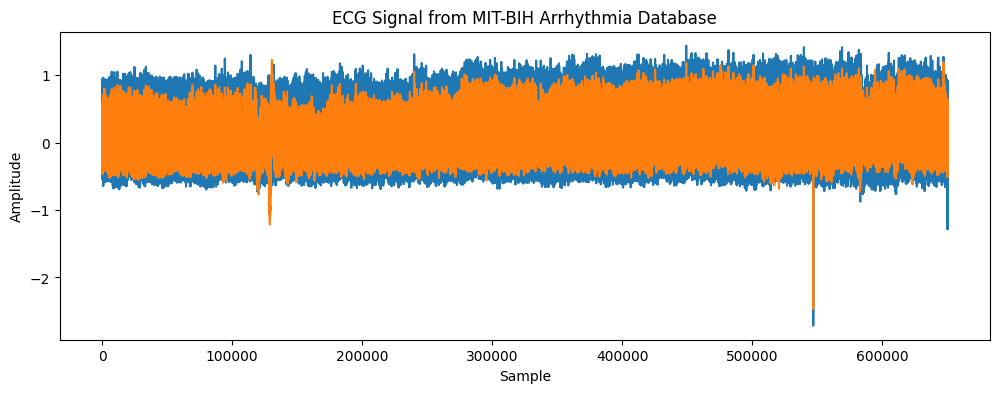

Text(0, 0.5, 'Amplitude (mV)')

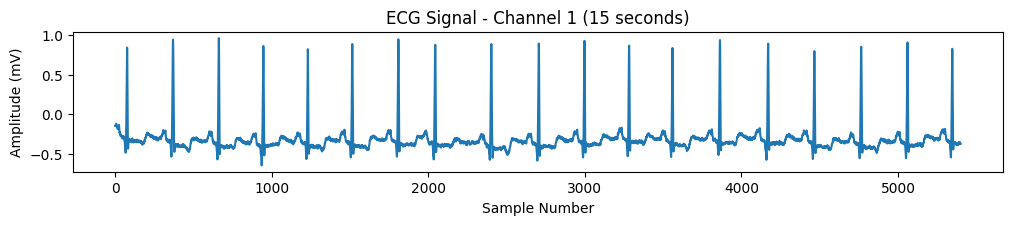

In [49]:
plt.figure(figsize=(12, 4))
plt.plot(signal)
plt.title('ECG Signal from MIT-BIH Arrhythmia Database')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

sampling_frequency = 360  # Hz
duration = 15  # 
num_samples = sampling_frequency * duration

signal_scaled = signal[:num_samples, :]

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(signal_scaled[:, 0])
plt.title('ECG Signal - Channel 1 (' + str(duration)  + ' seconds)')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude (mV)')


4. Data preprocessing

In [50]:
scaler = StandardScaler()

signal_scaled = scaler.fit_transform(signal)

4.1. Isolation Forest

In [51]:
# Fit the Isolation Forest model from pyod
iso_forest = IForest(contamination=0.1, random_state=42)
iso_forest.fit(signal_scaled)

# Predict anomalies
anomalies_iforest = iso_forest.predict(signal_scaled)

# Convert predictions to boolean (1 for anomaly, 0 for normal)
anomalies_iforest = np.where(anomalies_iforest == 1, 1, 0)

signal_subset = signal_scaled[:num_samples]

4.3. LOF - Local outlier Factor

In [52]:
lof = LOF()

# Fit the model
lof.fit(signal_scaled)

# Get the outlier scores and predict the labels
anomalies_lof = lof.predict(signal_scaled)
anomalies_lof = np.where(anomalies_lof == 1, 1, 0)

4.2. CBLOF - Cluster-Based Local Outlier Factor

In [53]:
cblof = CBLOF(contamination=0.1, random_state=42)
cblof.fit(signal_scaled)

anomalies_cblof = cblof.predict(signal_scaled)

anomalies_cblof = np.where(anomalies_cblof == 1, 1, 0)

num_channels = signal_scaled.shape[1]

5. Comparing the results

5.1. Across the entire duration of the ECG reading

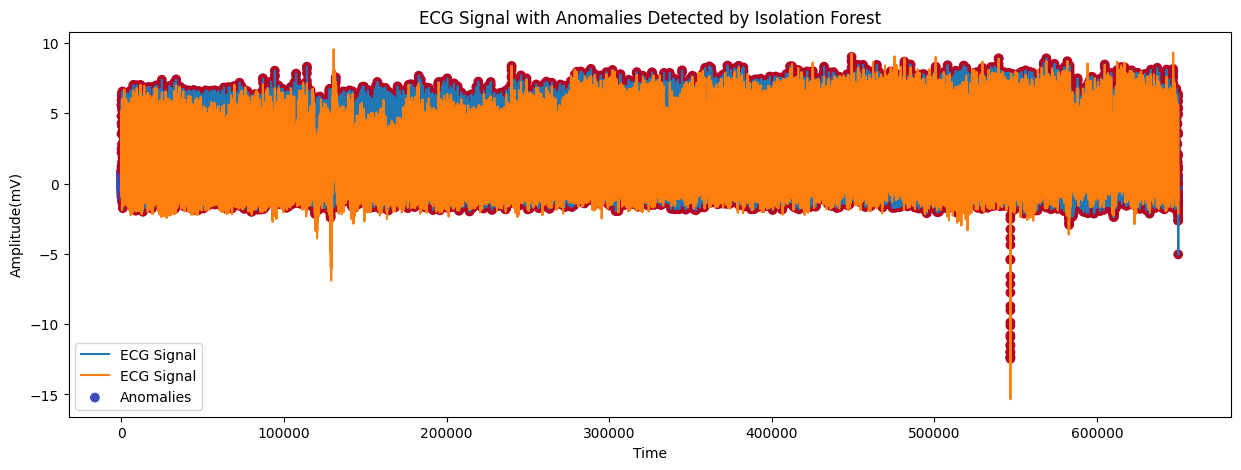

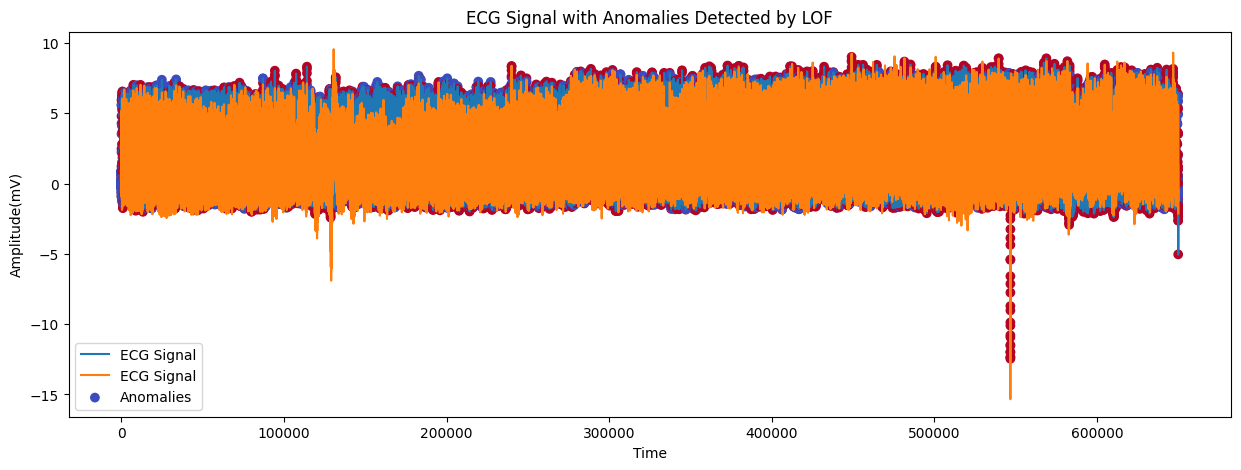

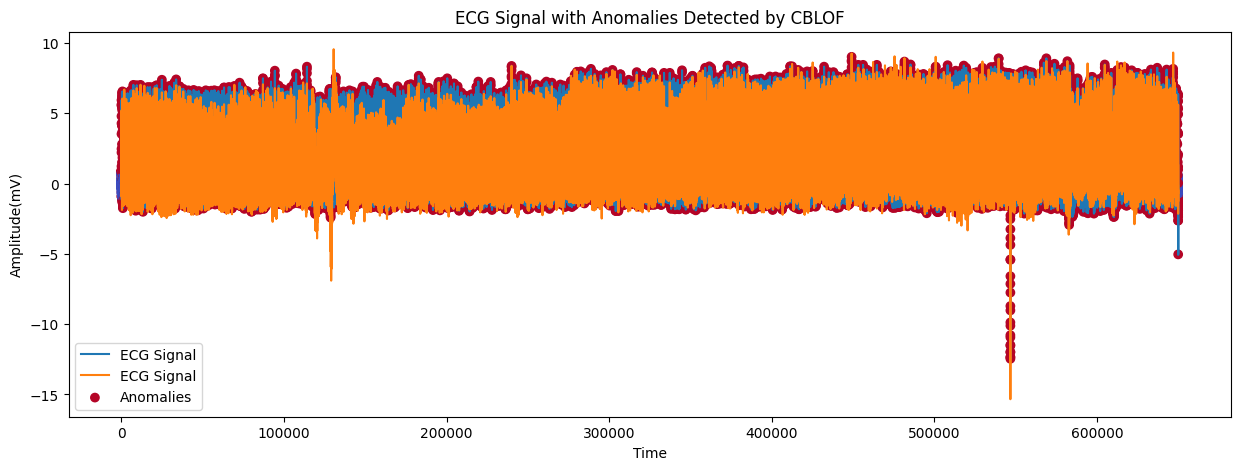

In [54]:
plt.style.use('default')

plt.figure(figsize=(15, 5))
plt.plot(signal_scaled, label='ECG Signal')
plt.scatter(np.arange(len(signal_scaled)), signal_scaled[:, 0], c=anomalies_iforest, cmap='coolwarm', label='Anomalies')
plt.title('ECG Signal with Anomalies Detected by Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Amplitude(mV)')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(signal_scaled, label='ECG Signal')
plt.scatter(np.arange(len(signal_scaled)), signal_scaled[:, 0], c=anomalies_lof, cmap='coolwarm', label='Anomalies')
plt.title('ECG Signal with Anomalies Detected by LOF')
plt.xlabel('Time')
plt.ylabel('Amplitude(mV)')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(signal_scaled, label='ECG Signal')
plt.scatter(np.arange(len(signal_scaled)), signal_scaled[:, 0], c=anomalies_cblof, cmap='coolwarm', label='Anomalies')
plt.title('ECG Signal with Anomalies Detected by CBLOF')
plt.xlabel('Time')
plt.ylabel('Amplitude(mV)')
plt.legend()
plt.show()

5.2. Across a given duration

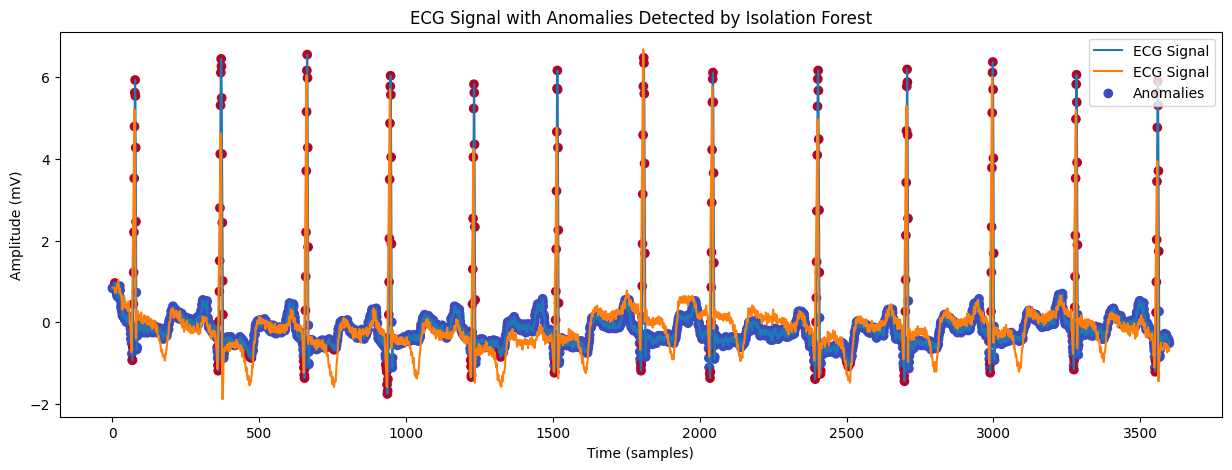

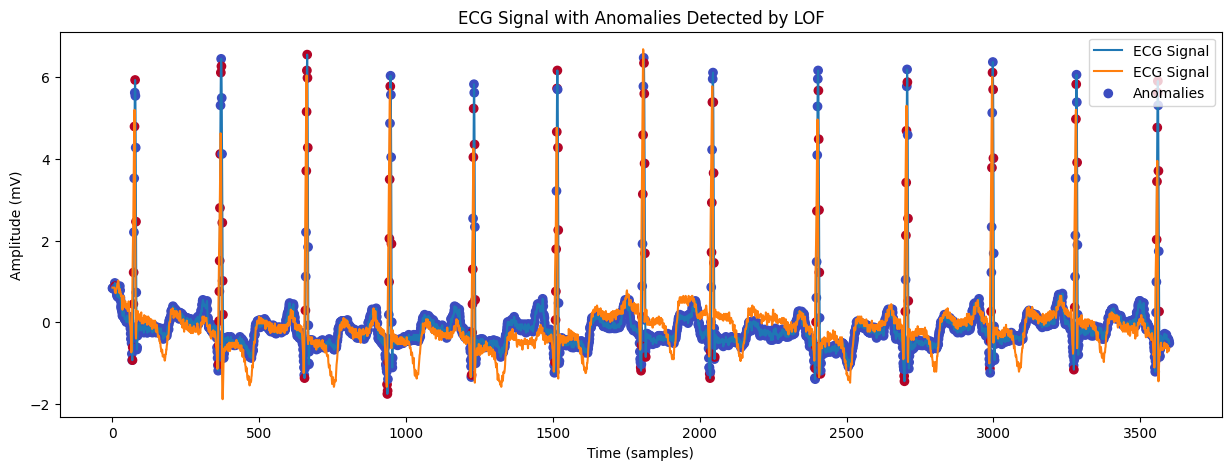

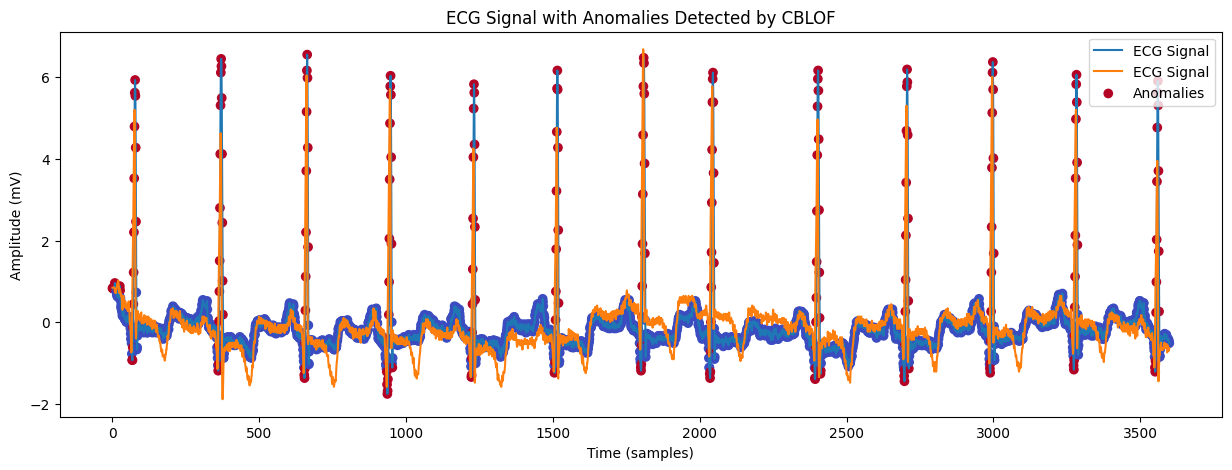

In [55]:
N = 10 # Number of seconds to plot
sampling_rate = record.fs  # Sampling rate of the dataset
num_samples = int(N * sampling_rate)

signal_subset = signal_scaled[:num_samples]

# Select the subset of data and anomalies for N seconds
signal_subset = signal_scaled[:num_samples]
anomalies_iforest_subset = anomalies_iforest[:num_samples]
anomalies_lof_subset = anomalies_lof[:num_samples]
anomalies_cblof_subset = anomalies_cblof[:num_samples]

# Set the style to a light theme
plt.style.use('default')

# Plot the results for Isolation Forest
plt.figure(figsize=(15, 5))
plt.plot(signal_subset, label='ECG Signal')
plt.scatter(np.arange(len(signal_subset)), signal_subset[:, 0], c=anomalies_iforest_subset, cmap='coolwarm', label='Anomalies')
plt.title('ECG Signal with Anomalies Detected by Isolation Forest')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()

# Plot the results for LOF
plt.figure(figsize=(15, 5))
plt.plot(signal_subset, label='ECG Signal')
plt.scatter(np.arange(len(signal_subset)), signal_subset[:, 0], c=anomalies_lof_subset, cmap='coolwarm', label='Anomalies')
plt.title('ECG Signal with Anomalies Detected by LOF')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()

# Plot the results for CBLOF
plt.figure(figsize=(15, 5))
plt.plot(signal_subset, label='ECG Signal')
plt.scatter(np.arange(len(signal_subset)), signal_subset[:, 0], c=anomalies_cblof_subset, cmap='coolwarm', label='Anomalies')
plt.title('ECG Signal with Anomalies Detected by CBLOF')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()